# <font color="darkblue"> Prática 01: Classificação Linear - Regressão Logística </font>

**Objetivos:**


*   Implementar o modelo linear de *Regressão Logística*
*   Comparar seu resultado de classificiação linear com o LRClassifier

**Requisitos de execução:**


*   Upload dos arquivos *random_input.py*, *linearregression.py* e *lrclassifier.py*

**Atividade 1:**

1. Gere $N=100$ pontos aleatórios com rótulos de classificação utilizando a classe RandomInput da Aula 14;

    

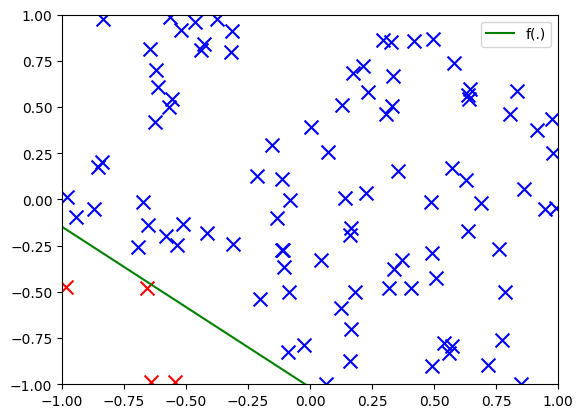

In [68]:
from random_input import RandomInput, draw
    
N = 100
rIN = RandomInput()
_X, _y = rIN.get_linear_input(N)
    
draw(_X, _y, rIN)

**Atividade 2:**

Implemente a *Regressão Logística* com o algoritmo *Gradiente Descendente*:

1. $w(0)=0$; $\eta = 0.1$;
2. **Para** $t=0,1,2..,tmax$ **faça**
3. $\quad\quad g_t=-\frac{1}{N}\sum_{n=1}^{N}\frac{y_nx_n}{1+e^{y_nw^T(t)x_n}}$;
4. $\quad\quad$ **Se** $(\lVert g_t \rVert < \epsilon)$ : **break**;
5. $\quad\quad w(t+1) = w(t) - \eta g_t$;
6. Retorne $w$


In [69]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample 


class LogisticRegression_:
    def __init__(self, eta=0.1, tmax=1000, bs=1000000):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = bs

    # Infere o vetor w da funçao hipotese
    # Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida estocástico
    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)
        N = X.shape[0]
        d = X.shape[1]
        epsilon = 0.001

        w = np.zeros(d)
        self.w = []

        for t in range(self.tmax):
            if self.batch_size < N:
                indices = np.random.choice(N, self.batch_size, replace=False)
                batchX = X[indices]
                batchY = y[indices]
            else:
                batchX = X
                batchY = y

            # Computar o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                gt = (yn * xn) / (1 + np.exp((yn * w).T @ xn))
                w = w + self.eta * gt

            # Condição de parada se ||deltaf|| < epsilon
            if LA.norm(gt) < epsilon:
                break

        self.w = w

    # Funcao hipotese inferida pela regressa logistica  
    def predict_prob(self, X):
        return [(1 / (1 + np.exp(-(self.w.T @ x)))) for x in X]

    # Predicao por classificação linear
    def predict(self, X):
        return [1 if (1 / (1 + np.exp(-(self.w.T @ x)))) >= 0.5 else 0 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

**Atividade 3:** 

1. Utilize o algoritmo de *Regressão Logística* para computar a função hipótese $g(x)=\theta(w^Tx)$ inferida sobre os pontos aleatórios gerados;
2. Plote, em um gráfico de dispersão, a probabilidade inferida pelo algoritmo em cada ponto;
3. Utilize a *Regressão Logística* como classificador linear e plote os pontos classificados com bolinha azul(1) e vermelha(0);
4. Compute o erro dentro da amostra gerado pela classificação linear do algoritmo de *Regressão Logistica*.


[0.9999957913433596, 0.9999999998327644, 0.9999999988491595, 0.9999993580749214, 0.9998538982590792, 0.9999999922585162, 0.9999999999845779, 0.9999999475984623, 0.997077982617435, 0.9999999999969471, 0.9999999685521516, 0.9999999994454547, 0.9999999995480484, 0.9999894537497915, 0.9999147684836904, 0.9999999969934374, 0.9684333437018087, 0.9999999929624936, 0.999999051402869, 0.9999999426209665, 0.9999992108146512, 0.9999995408623578, 0.9871701020046407, 0.9999007342476388, 0.9999999376741721, 0.9999398538243938, 0.9999999930323187, 0.9999334550101936, 0.01867441609696236, 0.9999988219407927, 0.9999634638508815, 0.9999914523257889, 0.9998100076450379, 0.9405485701726951, 0.9974300774353736, 0.9999837706378922, 0.9952373035934639, 0.9999999440474032, 0.9999999999894114, 0.9999999145352834, 0.9999999993028956, 0.8279949360139994, 0.9982393787424089, 0.9998773387051033, 0.999999999986871, 0.9999999999933724, 0.9999998214041167, 0.999952959542407, 0.007097442859752884, 0.9996645262316021, 

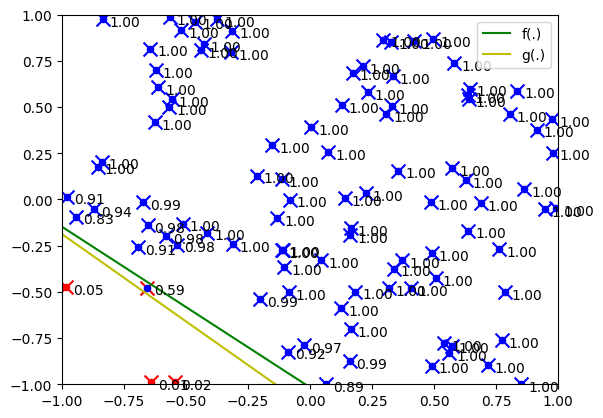

In [70]:
from matplotlib import pyplot as plt

draw(_X, _y, rIN)
rx = [ [1, x[0], x[1]] for x in _X]

#Executar o ajuste dos dados com Regressao Logistica
classifier = LogisticRegression_(0.1, 1000)
classifier.fit(rx, _y)

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_prob(rx)
print(pred)

for x, pred_x in zip(_X, pred) :
  plt.annotate("{:.2f}".format(pred_x), xy=(x[0], x[1]), xytext=(5,-5), textcoords='offset points')

#desenha a reta inferida pela regressao logistica
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [_X[i][0] for i in range(N) if(pred[i] >= 0.5)]
yP = [_X[i][1] for i in range(N) if(pred[i] >= 0.5)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0.5)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0.5)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")


**Atividade 4:**

1. Reproduza o mesmo experimento para o classificador linear com Regressão Linear (*RCClassifier*);
2. Implemente o algoritmo *Gradiente Descendente Estocástico* na classe *LogisticRegression_* e compare os resultados.

Ein = 4.0%


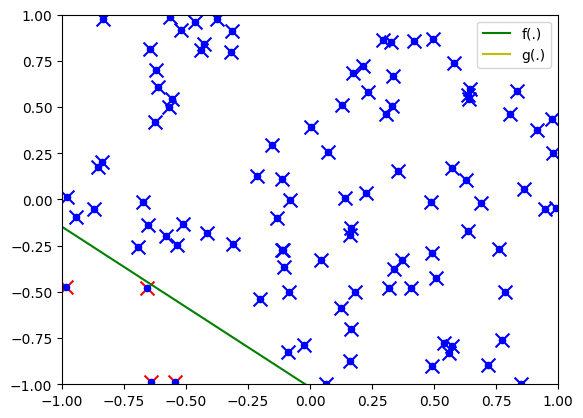

In [71]:
from lrclassifier import LRClassifier

classifier = LRClassifier()
classifier.fit(rx, _y)

draw(_X, _y, rIN)

#desenha a reta inferida pela regressao linear
xRL = [-1, +1]
yRL = [classifier.getRegressionY(xRL[0]), classifier.getRegressionY(xRL[1])]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
pred = classifier.predict(rx)
xP = [_X[i][0] for i in range(N) if(pred[i] > 0)]
yP = [_X[i][1] for i in range(N) if(pred[i] > 0)]
xN = [_X[i][0] for i in range(N) if(pred[i] < 0)]
yN = [_X[i][1] for i in range(N) if(pred[i] < 0)]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

#Computando o erro dentro da amostra (Ein)
eIn = 0
for i in range(N):
  if(pred[i] != _y[i]):
    eIn += 1
eIn /= N
print("Ein = " + str(eIn * 100) + "%")

Atividade 5:

1. Reproduza o mesmo experimento com a classe LogisticRegression do pacote *sklearn.linear_model*
        from sklearn.linear_model import LogisticRegression

Error in : 4.0%


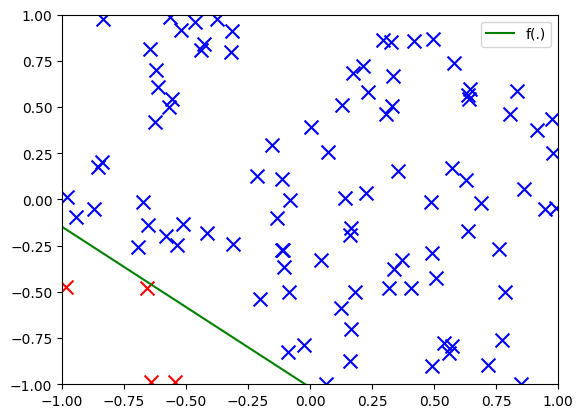

In [72]:
from sklearn.linear_model import LogisticRegression
draw(_X, _y, rIN)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(rx, _y) 

#Plota as porcentagens da Regressao Logistica 
pred = classifier.predict_proba(rx)
#print(pred)

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(rx)
#print(pred)

errorIN = 0
for pn, yn in zip(pred, _y):
  if(pn != yn):
    errorIN += 1

print("Error in : " + str(errorIN/N * 100) + "%")
